# 다항 회귀(Polynomial Regression)

- Polynomial Regression과 과대적합/과소적합의 이해

## 다항 회귀(Polynomial Regression) 이해

**다중선형회귀**

$ y = w_0 + w_1 X_{1} + w_2 X_{2} + w_3 X_{3} + ... + w_n X_{n} $
- 독립변수(festure)와 종속변수(target)의 관계가 일차방정식으로 표현된 회귀
- 직선으로 표현

**다항회귀**

$ y = w_0 + w_1 X_{1} + w_2 X_{2} + w_3 X_{1}X_{2} + w_4 X_{1}^2 + w_5 X_{2}^2 $

- 회귀가 독립변수의 일차식이 아닌 2차식, 3차식 등 다항식으로 표현되는 회귀식
- 선형회귀임

$ z=[X_{1} , X_{2} , X_{1}X_{2} , X_{1}^2, X_{2}^2 ] $라고 하면

$ y = w_0 + w_1 Z_{1} + w_2 Z_{2} + w_3 Z_{3} + w_4 Z_{4} + w_5 Z_{5} $

[참고] 선형/비선형 기준
- 회귀계수가 선형/비선형인지에 따른 것이지 독립변수의 선형/비선형 여부와 무관함

**사이킷런은 다항회귀를 위한 클래스를 명시적으로 제공하지 않음**
- 다항 회귀가 선형 회귀이므로 PolynomalFeatures 클래스를 통해 독립변수(피처)를 다항식 피처로 변환

PolynomialFeatures(degree=차수)

fit_transform(피처)

## 사이킷런 PolynomialFeatures 사용

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

X = np.arange(6).reshape(3,2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [4]:
poly = PolynomialFeatures(degree=2) #degree : 차수

#transform from (x1, x2) to (1, x1, x2, x1^2, x1*x2, x2^2)

poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [5]:
X2 = np.arange(9).reshape(3,3)
print(X2)
#transform from (x1, x2, x3) to (1, x1, x2, x3, x1^2, x1*x2, x1*x3, x2^2, x2*x3, x3^2)
poly.fit_transform(X2)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


array([[ 1.,  0.,  1.,  2.,  0.,  0.,  0.,  1.,  2.,  4.],
       [ 1.,  3.,  4.,  5.,  9., 12., 15., 16., 20., 25.],
       [ 1.,  6.,  7.,  8., 36., 42., 48., 49., 56., 64.]])

In [31]:
def polynomial_func(X):
    y = 1 + 2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3
#     print(X[:, 0])
#     print(X[:, 1])
    return y

X = np.arange(0,4).reshape(2,2)
print('일차 단항식 계수 feature : \n', X)

y = polynomial_func(X)
print('삼차 다항식 결정값 : \n', y)

일차 단항식 계수 feature : 
 [[0 1]
 [2 3]]
삼차 다항식 결정값 : 
 [  5 125]


In [37]:
poly = PolynomialFeatures(degree=3) #degree : 차수

#transform from (x1, x2) to (1, x1, x2, x1^2, x1*x2, x2^2)
X = np.arange(0,4).reshape(1,-1)
print(X)
poly.fit_transform(X)

[[0 1 2 3]]


array([[1., 0., 1., 2., 3., 0., 0., 0., 0., 1., 2., 3., 4., 6., 9.]])

## 3차 다항식 계수의 피쳐값과 3차 다항식 결정값으로 학습

In [14]:
from sklearn.linear_model import LinearRegression

X = np.arange(0,4).reshape(2,2)
print('일차 단항식 계수 feature : \n', X)

#3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feutre : \n', poly_ftr)

#Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수 \n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape : ', model.coef_.shape)

일차 단항식 계수 feature : 
 [[0 1]
 [2 3]]
3차 다항식 계수 feutre : 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape :  (10,)


## 사이킷런 파이프 라인 활용

In [15]:
from sklearn.pipeline import Pipeline

def polynomial_func(X):
    y = 1 + 2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3
    return y

#Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                 ('linear', LinearRegression())])

X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수 \n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


## 가상 데이터 생성 및 다항 회귀 추정

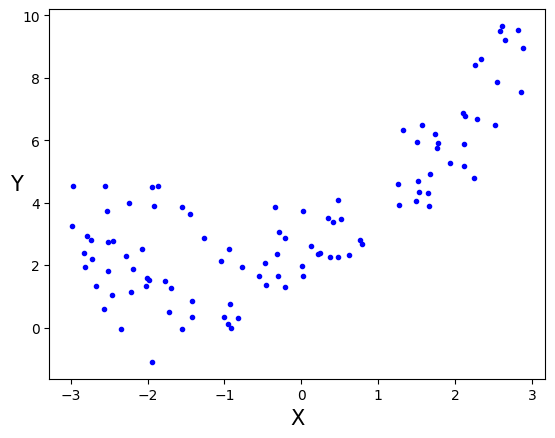

In [16]:
import matplotlib.pyplot as plt

m = 100
X = 6 * np.random.rand(m,1)-3
y = 0.5 * X**2 + X +2 +np.random.randn(m,1)

plt.plot(X, y, 'b.')
plt.ylabel('Y', fontsize=15, rotation=0)
plt.xlabel('X', fontsize=15)
plt.show()

## 다항식으로 변환

In [17]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

## 선형회귀 Linear Regression 적용하여 회귀 계수 추정

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.26575796]), array([[1.08631542, 0.44886007]]))

## 다항회귀식 시각화

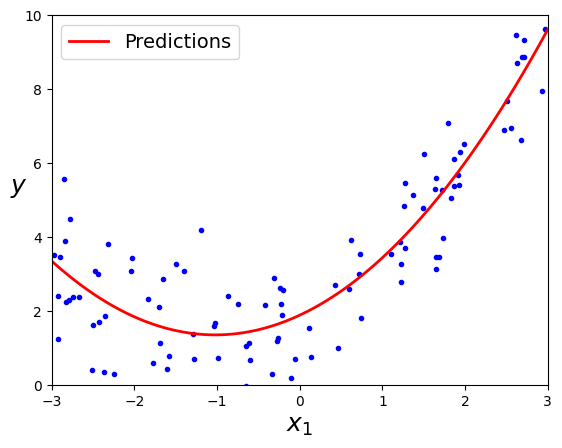

In [22]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

### 다항회귀를 이용한 보스톤 집값 예측 평가 및 주의점

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data, y_target,
                                                       test_size=0.3, random_state=156)

Boston 데이타셋 크기 : (506, 14)


In [20]:
## Pipeline을 이용하여 PolynomialFeatures 변환과 LinearRegression 적용을 순차적으로 결합. 
## 'poly' : 첫번째 스탭의 이름(변수명처럼 직접 만들어 지어줌)
## 'linear' : 두번째 스탭의 이름두번째 스탭의 이름

p_model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression())])

In [21]:
p_model.fit(X_train, y_train)

# linear스텝의 속성 coef_를 반환
print('Polynomial 회귀 계수\n', np.round(p_model.named_steps['linear'].coef_, 2))

y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

Polynomial 회귀 계수
 [-1.09063739e+09 -8.13000000e+00 -9.00000000e-02 -7.01000000e+00
  3.69700000e+01  2.53630000e+02  3.09600000e+01  1.25000000e+00
 -1.20200000e+01  3.09000000e+00 -1.30000000e-01  7.76000000e+00
  5.00000000e-02  5.10000000e-01 -0.00000000e+00  2.70000000e-01
  6.00000000e-01  1.86000000e+00 -1.40000000e-01 -0.00000000e+00
  1.00000000e-02 -1.00000000e-01  5.90000000e-01 -6.00000000e-02
  9.60000000e-01 -0.00000000e+00  4.00000000e-02 -0.00000000e+00
 -3.00000000e-02 -2.10000000e-01 -2.11000000e+00 -7.00000000e-02
  0.00000000e+00 -3.00000000e-02  1.00000000e-02  0.00000000e+00
 -2.00000000e-02  1.00000000e-02 -1.00000000e-02  4.00000000e-02
 -5.30000000e-01 -7.00000000e-02  1.90000000e-01  1.00000000e-02
  1.80000000e-01 -4.00000000e-02  0.00000000e+00 -7.00000000e-02
  1.00000000e-02 -2.00000000e-02  3.69700000e+01 -2.92400000e+01
 -5.98000000e+00 -3.00000000e-02  1.74000000e+00  3.00000000e-02
  3.00000000e-02 -1.99000000e+00  3.00000000e-02 -1.70000000e-01
 -7.701

In [22]:
# 2차 다항식을 해서 피처가 13개에서 104개로 늘어남
# 다항식 값이 높아질 수록 오버피팅을 급격하게 진행하고 오차가 늘어나게 된다.
# 다항식을 쓸때는 degree에 대해 주의 행 함
X_train_poly= PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train, y_train)
X_train_poly.shape, X_train.shape

((354, 104), (354, 13))

In [25]:
## include_bias 튜닝
## Pipeline을 이용하여 PolynomialFeatures 변환과 LinearRegression 적용을 순차적으로 결합. 
p_model = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),
                   ('linear', LinearRegression())])

p_model.fit(X_train, y_train)

y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

# 지료가 좋아짐
# MSE : 15.556 , RMSE : 3.944
# Variance score : 0.782

MSE : 15.556 , RMSE : 3.944
Variance score : 0.782


In [26]:
# ## Pipeline을 이용하여 PolynomialFeatures 변환과 LinearRegression 적용을 순차적으로 결합. 
## 3차 다항식으로 변경
p_model = Pipeline([('poly', PolynomialFeatures(degree=3, include_bias=False)),
                  ('linear', LinearRegression())])
# RMSE가 급격히 늘어나면서 오버피팅이 일어남
# MSE : 79625.593 , RMSE : 282.180
# Variance score : -1116.598

## 다항회귀의 단점 : 오버피팅이 일어나기 쉽다

p_model.fit(X_train, y_train)

y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 79625.593 , RMSE : 282.180
Variance score : -1116.598
